# Time Series Data Exploration & Visualization Assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read the sales.csv data set into a Pandas dataframe.

In [2]:
df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%202/sales.csv',sep=';')

### Convert the SalesDate field to a datetime data type.

In [3]:
df['SalesDate'] = pd.to_datetime(df['SalesDate'])
df

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8
2,3,13,94024,23,24,NaN,"0,00",2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0
3,4,8,73966,176,19,0.2,"0,00",2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3
...,...,...,...,...,...,...,...,...,...
6758120,6758121,10,50938,300,13,NaN,"0,00",2018-04-20 22:39:03.150,AHVBHVO7632V5YYD2VJT
6758121,6758122,18,85668,452,22,0.1,"0,00",2018-01-13 15:08:18.700,M4IA0FS13J9F0GJD4BX8
6758122,6758123,21,68409,405,18,NaN,"0,00",2018-01-18 12:05:16.950,7VZJ77UGBSX2SNCC1GFW
6758123,6758124,17,90315,104,23,NaN,"0,00",2018-02-26 08:13:37.850,3JTF5IF0YJLLXF9IRS8X


### Create a line chart showing the number of total units sold per day in February.

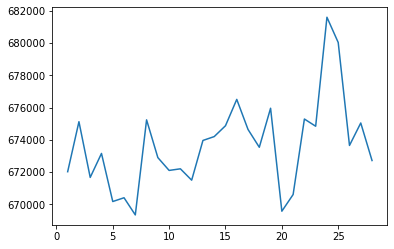

In [4]:
df['Month'] = df['SalesDate'].dt.month
df['Day'] = df['SalesDate'].dt.day
df1 = df[df['Month'] == 2.0]
df2 = df1.groupby('Day').sum()
plt.plot(df2.index, df2['Quantity'])

### Create a multi-line chart comparing the daily units sold in March for the following product IDs: 124, 344, 407, and 449.

In [5]:
def linechart(df,x,length=8,width=15,title=''):
    if df.index.name != x:
        df = df.set_index(x)
        
    ax = df.plot(figsize=(width,length), cmap='Set2')
    ax.legend(loc='upper center', bbox_to_anchor=(0.5,-0.1),
             fancybox=True,shadow=True,ncol=4)
    plt.title(title + '\n', fontsize=20)

In [6]:
df3 = df.loc[(df['ProductID'] == 124) | (df['ProductID'] == 344)| (df['ProductID'] == 407)| (df['ProductID'] == 449)]
df3 = df3[df3['Month'] == 3.0]
df3 = df3[['ProductID','Quantity','Day']]
df3

,ProductID,Quantity,Day
31,124,13,4.0
98,124,24,24.0
232,407,16,1.0
696,124,25,9.0
1677,449,5,9.0
...,...,...,...
6755205,344,8,24.0
6755470,124,10,10.0
6755491,344,15,2.0
6756781,449,25,27.0


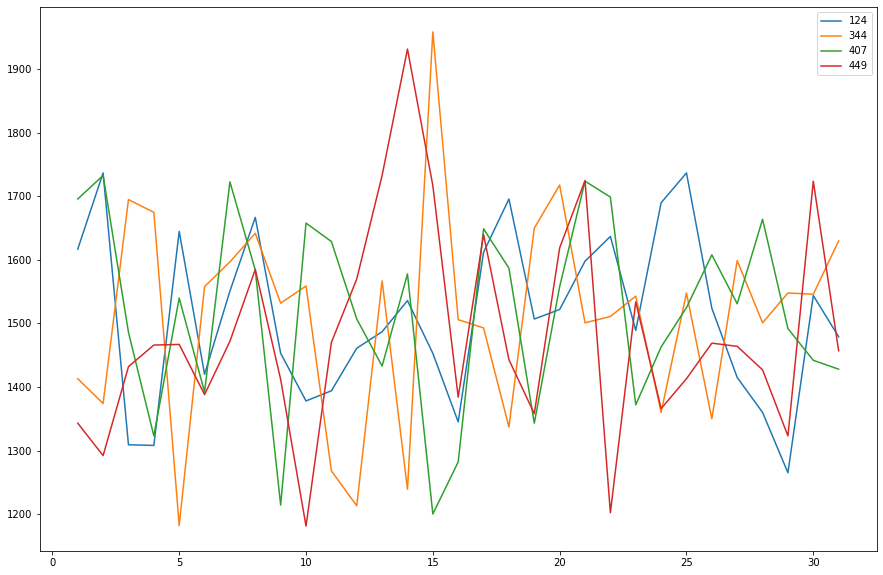

In [7]:
plt.figure(figsize=(15,10))
plt.plot(range(1,32), df3[df3['ProductID']==124].groupby('Day').sum()['Quantity'],label='124')
plt.plot(range(1,32), df3[df3['ProductID']==344].groupby('Day').sum()['Quantity'],label='344')
plt.plot(range(1,32), df3[df3['ProductID']==407].groupby('Day').sum()['Quantity'],label='407')
plt.plot(range(1,32), df3[df3['ProductID']==449].groupby('Day').sum()['Quantity'],label='449')
plt.legend()

### Create a bar chart that shows units sold by each hour of the day.

<BarContainer object of 24 artists>

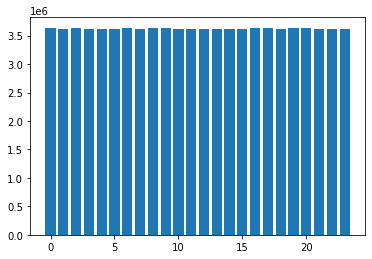

In [8]:
df['Hour'] = df['SalesDate'].dt.hour
df5 = df.groupby('Hour').sum()
plt.bar(x=df5.index,height=df5['Quantity'])

### Create a heatmap that shows total unit sales by hour of the day and day of the week.

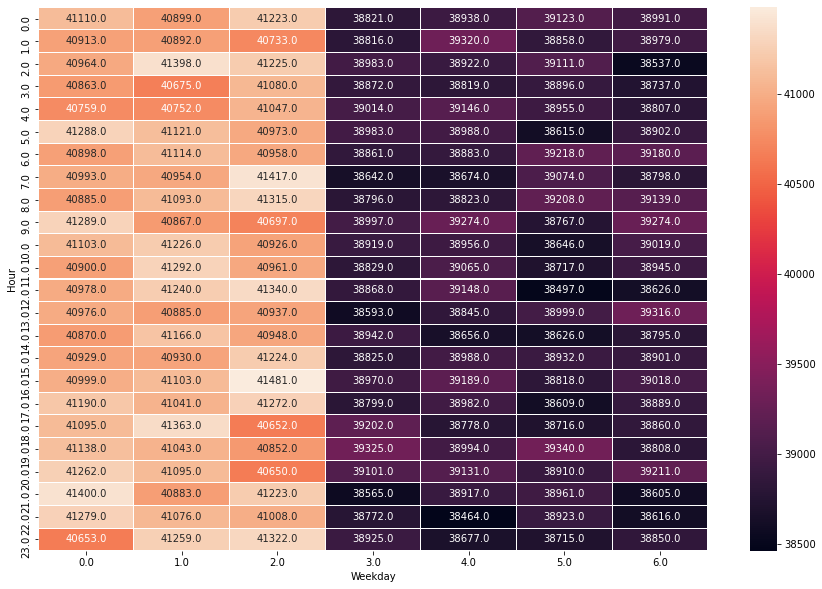

In [11]:
heatmap_df = df6.pivot_table(index="Hour", columns="Weekday", values="Quantity", aggfunc="count")
heatmap_df

plt.figure(figsize=(15,10))
sns.heatmap(heatmap_df, annot=True, fmt='.1f', linewidths=0.1)

### Choose 20 ProductIDs at random and create a correlation plot showing the correlation of daily units sold for them 

In [16]:
def correlation(df,title=''):
    corr = df.corr()
    mask = np.zeros_like(corr,dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    plt.subplots(figsize=(15,10))
    cmap = sns.diverging_palette(6,255,as_cmap=True)
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5)
    plt.title(title+'\n', fontsize=20)

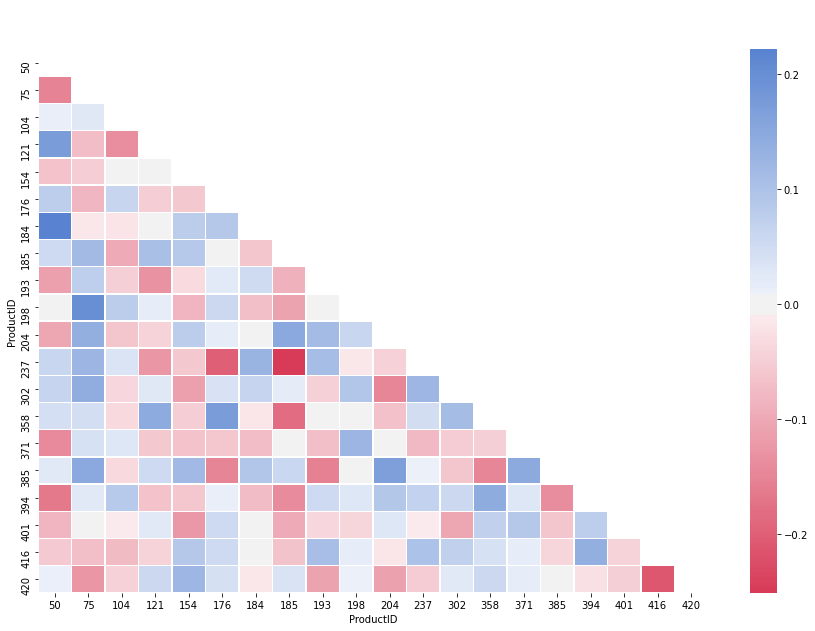

In [17]:
df['Date'] = df['SalesDate'].dt.date
rand = list(df['ProductID'].sample(20))

product_data = df[df['ProductID'].isin(rand)]
prod = product_data.pivot_table(index='Date', columns = 'ProductID', values='Quantity',aggfunc='sum')
correlation(prod,title='')

### Create a violin plot showing the distribution of daily units sold by month.

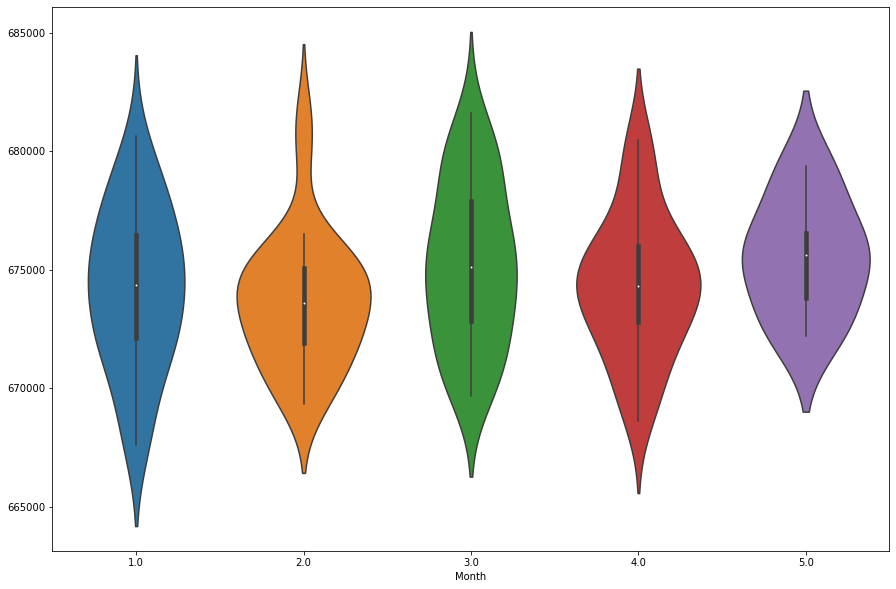

In [19]:
df8 = df.pivot_table(index='Date', columns='Month', values='Quantity', aggfunc='sum')
plt.figure(figsize=(15,10))
sns.violinplot(data=df8)
plt.show()